## Car prediction - Regression problem

## Exploratory data analysis

In [1]:
#Importing necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
cars = pd.read_excel('Data_Train.xlsx')

In [3]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


### Over view information of  dataset.

In [4]:
cars.shape # No of rows and columns.

(6019, 12)

In [5]:
cars.dtypes # data types of the features.

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [6]:
#No of unique labels in each categorical feature of train data
print("Unique values:\n")
print("Location : ",cars['Location'].unique())
print("Fuel type : ",cars['Fuel_Type'].unique())
print("Transmission : ",cars['Transmission'].unique())
print("owner type : ",cars['Owner_Type'].unique())

Unique values:

Location :  ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
Fuel type :  ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
Transmission :  ['Manual' 'Automatic']
owner type :  ['First' 'Second' 'Fourth & Above' 'Third']


In [8]:
cars.describe() # applicable only to numeric data.

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


From above, The highest price value of the car from data set is 160 lakhs.

In [9]:
cars.isnull().sum() # checks the number of missing values in each column.

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

There are four features containing null values, they are of object data type due to units.

In [10]:
cars[cars['Mileage'].isnull()] # to represent the rows containing nullvalues in 'Mileage' feature.

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


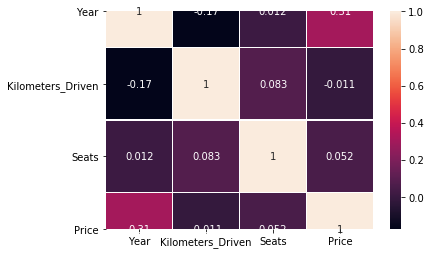

In [11]:
sb.heatmap(cars.corr(),annot=True,linewidths=.5) #shows correlation between numerical features.

In [12]:
cars.corr() # shows correlation between the numerical data.

,Year,Kilometers_Driven,Seats,Price
Year,1.000000,-0.173048,0.012333,0.305327
Kilometers_Driven,-0.173048,1.000000,0.083113,-0.011493
Seats,0.012333,0.083113,1.000000,0.052225
Price,0.305327,-0.011493,0.052225,1.000000


Here, Power and engine features have high correlation between them.

### Removing units of features and converting the data type

In the data set, the columns of Mileage,Engine , Power have string values and are object data type because of units. Hence , we need to remove units and convert them into float values. 

In [13]:
cars['Mileage']=cars['Mileage'].str.strip(('km/kg') or (' kmpl'))
cars['Mileage']=cars['Mileage'].str.strip(' kmpl').astype(float)
cars['Engine'] =cars['Engine'].str.strip(' CC').astype(float)
cars['Power'] = cars['Power'].str.strip(' bhp')
cars['Power']= cars['Power'].replace({'null' : 0}).astype(float) # There are 'null bhp' strings in power.

In [14]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [15]:
cars.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

Thus, we converted the data types of object features(Mileage,Power,Engine) into float. Now, there are only five categorical features.

## Imputation of  Null values

In [16]:
cars.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [17]:
def imputeNAN(feature) :
    Mean_of_feature = cars[feature].mean()
    cars[feature].fillna(Mean_of_feature,inplace=True)

In [18]:
imputeNAN('Mileage')
imputeNAN('Engine')
imputeNAN('Power')
# Filling missing values using the function.

In [19]:
cars['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

Here, we have 0 seats which is not possible in a car. So,we consider it as missing value and replace it accordingly.

In [20]:
pd.crosstab(cars['Name'],cars['Seats']).sum() # To check the frequency of seats in most of the cars.

Seats
0.0        1
2.0       16
4.0       99
5.0     5014
6.0       31
7.0      674
8.0      134
9.0        3
10.0       5
dtype: int64

From above, Most of the cars have 5 seats, Thus we can fill the missing values of seats with 5. Here we considered mode.


In [21]:
cars['Seats'].fillna(5,inplace=True) #Filled missing values with 5 seats.

In [22]:
cars['Seats'].replace({0:5},inplace=True) #replaced 0 seats with 5 seats.

## Splitting of Name feature

The 'Name' feature may play a important in the predictions. To convert them into useful data, we need to spit the 'Name' feature.

In [23]:
for value in range((cars.shape[0])+1) :
    first_names = cars['Name'].str.split(' ',2)
# To split the name into brand , model  into lists. *It takes time to run and execute*.  

In [24]:
first_names # It is the list containing lists of Brand and model of the car.

0                 [Maruti, Wagon, R LXI CNG]
1       [Hyundai, Creta, 1.6 CRDi SX Option]
2                           [Honda, Jazz, V]
3                      [Maruti, Ertiga, VDI]
4        [Audi, A4, New 2.0 TDI Multitronic]
                        ...                 
6014                    [Maruti, Swift, VDI]
6015            [Hyundai, Xcent, 1.1 CRDi S]
6016               [Mahindra, Xylo, D4 BSIV]
6017                  [Maruti, Wagon, R VXI]
6018               [Chevrolet, Beat, Diesel]
Name: Name, Length: 6019, dtype: object

 We shall split the above single list into two lists

In [25]:
Brand_name=[]
model_name=[]
# Two lists created.

In [26]:
for i in range((cars.shape[0])):  
  Brand_name.append(first_names[i][0])
  model_name.append(first_names[i][1])
# brand and model are put into seperate lists.

In [27]:
cars.insert(1,'Brand_name',Brand_name)
cars.insert(2,'model_name',model_name)
# These lists are merged into original data set.

In [28]:
cars['Brand_name'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Bentley             1
Isuzu               1
Smart               1
Lamborghini         1
Ambassador          1
Name: Brand_name, dtype: int64

In [29]:
cars['Brand_name'].replace({'ISUZU':'Isuzu' },inplace = True) # Solved case sensitive problem.

In [30]:
cars['Brand_name'].nunique()

212

In [32]:
cars['model_name'].nunique()

212

In [33]:
cars.head()

,Name,Brand_name,model_name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Maruti,Wagon,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Honda,Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


### Plots for visualisation 

[Text(0, 0, 'Maruti'),
 Text(0, 0, 'Hyundai'),
 Text(0, 0, 'Honda'),
 Text(0, 0, 'Audi'),
 Text(0, 0, 'Nissan'),
 Text(0, 0, 'Toyota'),
 Text(0, 0, 'Volkswagen'),
 Text(0, 0, 'Tata'),
 Text(0, 0, 'Land'),
 Text(0, 0, 'Mitsubishi'),
 Text(0, 0, 'Renault'),
 Text(0, 0, 'Mercedes-Benz'),
 Text(0, 0, 'BMW'),
 Text(0, 0, 'Mahindra'),
 Text(0, 0, 'Ford'),
 Text(0, 0, 'Porsche'),
 Text(0, 0, 'Datsun'),
 Text(0, 0, 'Jaguar'),
 Text(0, 0, 'Volvo'),
 Text(0, 0, 'Chevrolet'),
 Text(0, 0, 'Skoda'),
 Text(0, 0, 'Mini'),
 Text(0, 0, 'Fiat'),
 Text(0, 0, 'Jeep'),
 Text(0, 0, 'Smart'),
 Text(0, 0, 'Ambassador'),
 Text(0, 0, 'Isuzu'),
 Text(0, 0, 'ISUZU'),
 Text(0, 0, 'Force'),
 Text(0, 0, 'Bentley'),
 Text(0, 0, 'Lamborghini')]

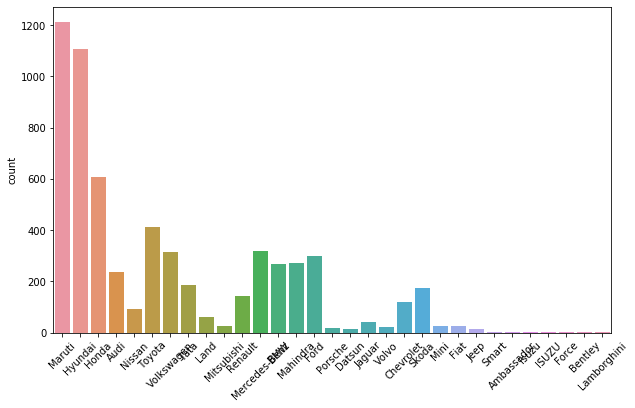

In [34]:
#plot between count and brand of the cars to see the frequency of each brand.
plt.subplots(figsize = (10,6))
chart = sb.countplot(data = cars,x = Brand_name)
chart.set_xticklabels(chart.get_xticklabels(),rotation = 45)

In this countplot , we can observe that there are more number of maruti cars and hyundai cars.

[Text(0, 0, 'Maruti'),
 Text(0, 0, 'Hyundai'),
 Text(0, 0, 'Honda'),
 Text(0, 0, 'Audi'),
 Text(0, 0, 'Nissan'),
 Text(0, 0, 'Toyota'),
 Text(0, 0, 'Volkswagen'),
 Text(0, 0, 'Tata'),
 Text(0, 0, 'Land'),
 Text(0, 0, 'Mitsubishi'),
 Text(0, 0, 'Renault'),
 Text(0, 0, 'Mercedes-Benz'),
 Text(0, 0, 'BMW'),
 Text(0, 0, 'Mahindra'),
 Text(0, 0, 'Ford'),
 Text(0, 0, 'Porsche'),
 Text(0, 0, 'Datsun'),
 Text(0, 0, 'Jaguar'),
 Text(0, 0, 'Volvo'),
 Text(0, 0, 'Chevrolet'),
 Text(0, 0, 'Skoda'),
 Text(0, 0, 'Mini'),
 Text(0, 0, 'Fiat'),
 Text(0, 0, 'Jeep'),
 Text(0, 0, 'Smart'),
 Text(0, 0, 'Ambassador'),
 Text(0, 0, 'Isuzu'),
 Text(0, 0, 'Force'),
 Text(0, 0, 'Bentley'),
 Text(0, 0, 'Lamborghini')]

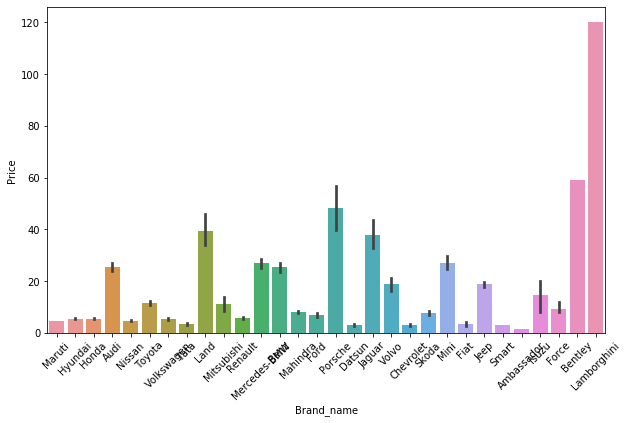

In [35]:
#plot between price and brand of car to see which brand has more price value.
plt.subplots(figsize = (10,6))
plot =sb.barplot(data = cars,x = cars.Brand_name, y = cars.Price)
plot.set_xticklabels(plot.get_xticklabels(),rotation = 45)

In this plot, we can observe that Lambhorgini branded cars are of more price, even though they are very less in number.So, brand of the car plays important role.

But, we cant assume that lambhorgini is more expensive than all. We have just seen that mean price of lamborgini car is highest than all.

##### Data(Row) of the car that is more expensive among all in the data set

In [36]:
cars[cars.Price ==cars['Price'].max()] # To check that which car is the most expensive.

,Name,Brand_name,model_name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Land,Rover,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,160.0


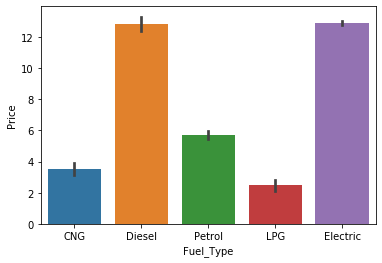

In [37]:
sb.barplot(data = cars,x='Fuel_Type',y='Price')

The electric and diesel cars are of high price.

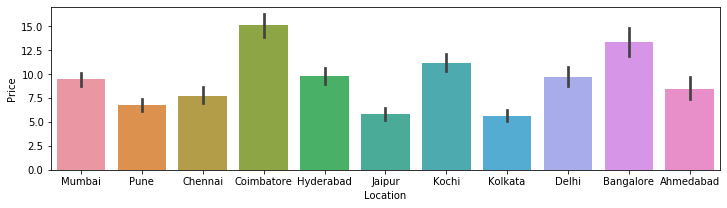

In [38]:
fig1,ax1 = plt.subplots(figsize =(12,3))
sb.barplot(data = cars, x='Location',y='Price',ax=ax1)

The cars in coimbatore are of high price

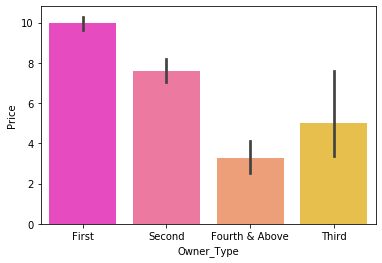

In [39]:
sb.barplot(data = cars,x = 'Owner_Type',y='Price',palette = 'spring')

First hand cars are of high price.

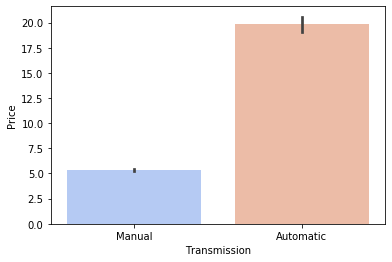

In [40]:
sb.barplot(data =  cars, x = 'Transmission',y = 'Price',palette = 'coolwarm')

Automatic cars are of high price

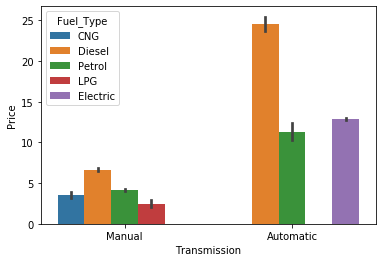

In [41]:
sb.barplot(data =  cars, x = 'Transmission',y = 'Price',hue = 'Fuel_Type')

From this, we may say that in this dataset,automatic cars dont use CNG , LPG as fuel.

# Encoding

Encoding is changing the categorical features into numerical ones because to fit the model, data need to be in numerical only. The models cannot interpret the categorical data.

In [42]:
# One hot encoding of nominal data using get_dummmies function.
Fuel_type=pd.get_dummies(cars['Fuel_Type'])
location=pd.get_dummies(cars['Location'],drop_first=True)
transmission=pd.get_dummies(cars['Transmission'],drop_first=True)

In [43]:
cars = pd.concat([cars,Fuel_type,location,transmission],axis = 1)
# Added the above encodings of numerical features to the data frame.

In [44]:
cars.head()

,Name,Brand_name,model_name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,...,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Manual
0,Maruti Wagon R LXI CNG,Maruti,Wagon,Mumbai,2010,72000,CNG,Manual,First,26.60,...,0,0,0,0,0,0,0,1,0,1
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta,Pune,2015,41000,Diesel,Manual,First,19.67,...,0,0,0,0,0,0,0,0,1,1
2,Honda Jazz V,Honda,Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,...,1,0,0,0,0,0,0,0,0,1
3,Maruti Ertiga VDI,Maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,...,1,0,0,0,0,0,0,0,0,1
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,...,0,1,0,0,0,0,0,0,0,0


There are original categorical features also in the dataset. They are not required anymore because we have encoded numerical data instead of them. We can drop these original categorical features from the dataset.

In [45]:
cars.drop(['Fuel_Type','Location','Transmission','Electric'],axis = 1,inplace = True)
# drop the original categorical columns from the data frame.
# We have also deleted Electric feature because The test data dont have that feature. 

In [46]:
cars['Owner_Type'].unique() # Owner_type has ordinal data. So, we can replace missing values accordingly.

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [47]:
cars['Owner_Type'].replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4},inplace = True)
# 'Owner_Type' feature is encoded. 

In [48]:
cars.head()

,Name,Brand_name,model_name,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,...,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Manual
0,Maruti Wagon R LXI CNG,Maruti,Wagon,2010,72000,1,26.60,998.0,58.16,5.0,...,0,0,0,0,0,0,0,1,0,1
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta,2015,41000,1,19.67,1582.0,126.20,5.0,...,0,0,0,0,0,0,0,0,1,1
2,Honda Jazz V,Honda,Jazz,2011,46000,1,18.20,1199.0,88.70,5.0,...,1,0,0,0,0,0,0,0,0,1
3,Maruti Ertiga VDI,Maruti,Ertiga,2012,87000,1,20.77,1248.0,88.76,7.0,...,1,0,0,0,0,0,0,0,0,1
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4,2013,40670,2,15.20,1968.0,140.80,5.0,...,0,1,0,0,0,0,0,0,0,0


#### New dataframe(copy of original)

Lets have a new copy of the data frame for experimentations and reference.

In [49]:
newcars = cars.copy() # object data frame is created.

In [50]:
newcars.head()

,Name,Brand_name,model_name,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,...,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Manual
0,Maruti Wagon R LXI CNG,Maruti,Wagon,2010,72000,1,26.60,998.0,58.16,5.0,...,0,0,0,0,0,0,0,1,0,1
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta,2015,41000,1,19.67,1582.0,126.20,5.0,...,0,0,0,0,0,0,0,0,1,1
2,Honda Jazz V,Honda,Jazz,2011,46000,1,18.20,1199.0,88.70,5.0,...,1,0,0,0,0,0,0,0,0,1
3,Maruti Ertiga VDI,Maruti,Ertiga,2012,87000,1,20.77,1248.0,88.76,7.0,...,1,0,0,0,0,0,0,0,0,1
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4,2013,40670,2,15.20,1968.0,140.80,5.0,...,0,1,0,0,0,0,0,0,0,0


In [51]:
newcars.isnull().sum()

Name                 0
Brand_name           0
model_name           0
Year                 0
Kilometers_Driven    0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
CNG                  0
Diesel               0
LPG                  0
Petrol               0
Bangalore            0
Chennai              0
Coimbatore           0
Delhi                0
Hyderabad            0
Jaipur               0
Kochi                0
Kolkata              0
Mumbai               0
Pune                 0
Manual               0
dtype: int64

#### Encoding brand and model featues

Here, we are replacing the brand and model names with corresponding mean of prices. 

In [52]:
brand_order = newcars.groupby(['Brand_name'])['Price'].mean().sort_values(ascending = True)
model_order= newcars.groupby(['model_name'])['Price'].mean().sort_values(ascending = True)

# created two series having their corresponding mean of prices.

In [53]:
newcars['Brand_name'].replace(brand_order,inplace=True)
newcars['model_name'].replace(model_order,inplace = True)

# Replaced with corresponding mean of prices.

In [54]:
newcars.head()

,Name,Brand_name,model_name,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,...,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Manual
0,Maruti Wagon R LXI CNG,4.517267,2.815714,2010,72000,1,26.60,998.0,58.16,5.0,...,0,0,0,0,0,0,0,1,0,1
1,Hyundai Creta 1.6 CRDi SX Option,5.343433,12.177634,2015,41000,1,19.67,1582.0,126.20,5.0,...,0,0,0,0,0,0,0,0,1,1
2,Honda Jazz V,5.411743,6.039828,2011,46000,1,18.20,1199.0,88.70,5.0,...,1,0,0,0,0,0,0,0,0,1
3,Maruti Ertiga VDI,4.517267,6.964800,2012,87000,1,20.77,1248.0,88.76,7.0,...,1,0,0,0,0,0,0,0,0,1
4,Audi A4 New 2.0 TDI Multitronic,25.537712,18.397051,2013,40670,2,15.20,1968.0,140.80,5.0,...,0,1,0,0,0,0,0,0,0,0


In [55]:
newcars.drop('Name',axis=1,inplace=True) # dropping 'Name' feature from the dataset.

In [56]:
newcars.head()

,Brand_name,model_name,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,...,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Manual
0,4.517267,2.815714,2010,72000,1,26.60,998.0,58.16,5.0,1.75,...,0,0,0,0,0,0,0,1,0,1
1,5.343433,12.177634,2015,41000,1,19.67,1582.0,126.20,5.0,12.50,...,0,0,0,0,0,0,0,0,1,1
2,5.411743,6.039828,2011,46000,1,18.20,1199.0,88.70,5.0,4.50,...,1,0,0,0,0,0,0,0,0,1
3,4.517267,6.964800,2012,87000,1,20.77,1248.0,88.76,7.0,6.00,...,1,0,0,0,0,0,0,0,0,1
4,25.537712,18.397051,2013,40670,2,15.20,1968.0,140.80,5.0,17.74,...,0,1,0,0,0,0,0,0,0,0


# Evaluation

### TrainTest split

For evaluation and metrics, we need to split the dataframe into train and test data.

In [57]:
x_train = newcars.drop('Price',axis = 1) # train data must not contain dependent variable.

In [58]:
x_train.head()

,Brand_name,model_name,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,CNG,...,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Manual
0,4.517267,2.815714,2010,72000,1,26.60,998.0,58.16,5.0,1,...,0,0,0,0,0,0,0,1,0,1
1,5.343433,12.177634,2015,41000,1,19.67,1582.0,126.20,5.0,0,...,0,0,0,0,0,0,0,0,1,1
2,5.411743,6.039828,2011,46000,1,18.20,1199.0,88.70,5.0,0,...,1,0,0,0,0,0,0,0,0,1
3,4.517267,6.964800,2012,87000,1,20.77,1248.0,88.76,7.0,0,...,1,0,0,0,0,0,0,0,0,1
4,25.537712,18.397051,2013,40670,2,15.20,1968.0,140.80,5.0,0,...,0,1,0,0,0,0,0,0,0,0


In [59]:
y_train = newcars['Price']

In [60]:
y_train.head()

0     1.75
1    12.50
2     4.50
3     6.00
4    17.74
Name: Price, dtype: float64

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [62]:
from sklearn.model_selection import train_test_split
x1train,x1test,y1train,y1test = train_test_split(x_train,y_train,test_size = 0.2,random_state = 0)

In [63]:
x1train.shape

(4815, 24)

In [64]:
y1train.shape

(4815,)

# Model fitting

In [65]:
def predictions(model) :
    model.fit(x1train,y1train)
    pred = model.predict(x1test)
    accuracy = model.score(x1test,y1test)
    print(accuracy*100,'%')
    error = np.sqrt(metrics.mean_squared_error(y1test,pred))
    print(error)

#### Model 1-Linear regression

In [66]:
model1 = LinearRegression()
model1.fit(x1train,y1train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
predictions(model1)

83.07924990413753 %
4.503823026453946


#### Model2-Random forest regression

In [68]:
regressor = RandomForestRegressor(n_estimators = 20,random_state=  0)

In [69]:
regressor.fit(x1train,y1train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [70]:
predictions(regressor)

92.37480474297345 %
3.0234096563804327


#### Model3- Knn regression

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

In [72]:
paramms = {'n_neighbors' : [2,3,4,5,6,7,8,9]}

In [73]:
knn = neighbors.KNeighborsRegressor()

In [74]:
model2 = GridSearchCV(knn,paramms,cv=5)

In [75]:
model2.fit(x1train,y1train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [76]:
predictions(knn)

54.3596128853438 %
7.396839086063471


From above three models, we use the model that gives us good metrics.